In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
loan_df = pd.read_csv("loan.csv")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12784\1429014459.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv("loan.csv")


In [3]:
loan_df.shape

(39717, 111)

In [4]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
#Performing data cleaning 
#Fixing Rows and Coloumns .Since there are no summary rows, header or footer rows , proceeding with column data fixing.
loan_df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
                              ...  
tax_liens                         1
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64

In [6]:
#Removing columns having no or 1 unique values as this would not effect our anaylsis
nouniquevaluecol = loan_df.nunique()[loan_df.nunique().values == 0].index

In [7]:
loan_df.drop(columns=list(nouniquevaluecol),inplace=True)

In [8]:
loan_df.shape

(39717, 57)

In [9]:
singleuniquevaluecol = loan_df.nunique()[loan_df.nunique().values == 1].index

In [10]:
loan_df.drop(columns=list(singleuniquevaluecol),inplace=True)

In [11]:
loan_df.shape

(39717, 48)

In [12]:
#columns like id, member_id, url can be removed as this will not have any effect on our analysis
loan_df.drop(columns=['id','member_id','url'],inplace=True)

In [13]:
loan_df.shape

(39717, 45)

In [14]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [15]:
#columns assigned to customer after loan is sanctioned will also not have effect.
loansanctionedcolumns = ['out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d']

In [16]:
loan_df.drop(columns=loansanctionedcolumns ,inplace= True)

In [17]:
loan_df.shape

(39717, 32)

In [18]:
#Fixing Mixing values - Delete rows and columns
loan_df.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2459
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
desc                      12940
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq    25682
mths_since_last_record    36931
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
pub_rec_

In [19]:
#columns having more than 30%  i.e 11k+ records are null values can be removed.
nullcolumnvalues=loan_df.isnull().sum()[(loan_df.isnull().sum().values > 11000) & ((loan_df.isnull().sum().values < 39717))].index

In [20]:
loan_df.drop(columns=list(nullcolumnvalues),inplace=True)

In [21]:
loan_df.shape

(39717, 29)

In [22]:
#Checking if any row has null values  across all columns
loan_df.isnull().sum(axis =1).values.max()

3

In [23]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [24]:
#Filtering Data 
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [25]:
#Filtering Current loan status as its not required for risk analysis
loan_df = loan_df[~(loan_df.loan_status== 'Current')]

In [26]:
loan_df.shape

(38577, 29)

### Univariate Analysis

In [27]:
loan_df.term.value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [28]:
loan_df.int_rate.value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: int_rate, Length: 370, dtype: int64

In [29]:
#removing % to perform aggregate function
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x : pd.to_numeric(x.split("%")[0]))

In [30]:
loan_df.int_rate.describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [31]:
import matplotlib.pyplot as plt

<Axes: >

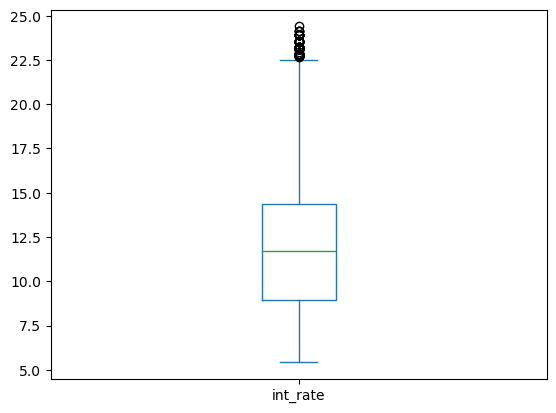

In [32]:
loan_df['int_rate'].plot.box()

In [33]:
##The plot shows there are outliner values in the int_rate.

In [34]:
loan_df.grade.value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [35]:
loan_df.sub_grade.value_counts()

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64

In [36]:
loan_df['emp_title'].value_counts()

US Army                                     131
Bank of America                             107
IBM                                          65
AT&T                                         57
Kaiser Permanente                            56
                                           ... 
amneal pharmaceuticals                        1
Net Equity Financial                          1
Kernersville Fire Department                  1
The Keith Corp. (empl by county, now Kei      1
Evergreen Center                              1
Name: emp_title, Length: 28027, dtype: int64

In [37]:
loan_df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [38]:
loan_df['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [39]:
loan_df['verification_status'].value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

In [40]:
loan_df['issue_d'].value_counts()

Nov-11    2062
Dec-11    2042
Oct-11    1941
Sep-11    1913
Aug-11    1798
Jul-11    1745
Jun-11    1728
May-11    1609
Apr-11    1559
Mar-11    1442
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

In [41]:
month,year = loan_df['issue_d'].str.split('-').str

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12784\3874173415.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  month,year = loan_df['issue_d'].str.split('-').str


In [42]:
loan_df['issued_year'] = pd.to_numeric(year)

In [43]:
loan_df['issued_month'] = month

In [44]:
loan_df['issued_year'].value_counts()

11    20516
10    11532
9      4716
8      1562
7       251
Name: issued_year, dtype: int64

In [45]:
loan_df['issued_month'].value_counts()

Dec    4215
Nov    4006
Oct    3761
Sep    3498
Aug    3388
Jul    3351
Jun    3180
May    2919
Apr    2831
Mar    2691
Jan    2379
Feb    2358
Name: issued_month, dtype: int64

In [46]:
loan_df.drop(columns=['issue_d'],inplace=True)

In [47]:
loan_df['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [48]:
loan_df['title'].value_counts()

Debt Consolidation           2090
Debt Consolidation Loan      1620
Personal Loan                 641
Consolidation                 491
debt consolidation            478
                             ... 
Murray Loan                     1
Need debt consolidation!        1
freedom2                        1
DAVE WEDDING                    1
JAL Loan                        1
Name: title, Length: 19297, dtype: int64

In [49]:
#Dropping this columns has it has many unique values and not requied for analysis
loan_df.drop(columns=['title'],inplace=True)

In [50]:
loan_df['earliest_cr_line'].value_counts()

Oct-99    360
Nov-98    357
Oct-00    341
Dec-98    340
Dec-97    318
         ... 
Nov-65      1
Feb-73      1
Oct-08      1
Dec-61      1
Oct-74      1
Name: earliest_cr_line, Length: 524, dtype: int64

In [51]:
earliest_cr_line_month,earliest_cr_line_year = loan_df['earliest_cr_line'].str.split('-').str

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12784\1365320374.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  earliest_cr_line_month,earliest_cr_line_year = loan_df['earliest_cr_line'].str.split('-').str


In [52]:
earliest_cr_line_year.value_counts()

00    3160
99    2896
98    2773
01    2462
97    2387
96    2202
95    2078
94    1948
02    1890
03    1813
04    1727
05    1467
93    1460
06    1154
92    1029
90    1005
91     945
89     834
88     709
07     698
87     590
86     478
85     439
84     395
83     322
82     215
81     181
80     175
78     161
79     157
08     153
77     112
76      93
75      83
74      62
73      61
72      49
70      47
71      45
69      37
68      19
67      18
66      11
63      10
65       8
64       6
62       5
54       2
61       2
59       1
56       1
46       1
50       1
Name: earliest_cr_line, dtype: int64

In [53]:
loan_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies,issued_year
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,37880.000000,38577.000000
mean,11047.025430,10784.058506,10222.481123,11.932219,322.466318,6.877797e+04,13.272727,0.146668,0.871737,9.275423,0.055422,13289.489826,22.052648,0.043479,10.309070
std,7348.441646,7090.306027,7022.720644,3.691327,208.639215,6.421868e+04,6.673044,0.492271,1.071546,4.401588,0.237804,15866.492241,11.425861,0.204583,0.882658
min,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,7.000000
25%,5300.000000,5200.000000,5000.000000,8.940000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,3650.000000,13.000000,0.000000,10.000000
50%,9600.000000,9550.000000,8733.440000,11.710000,277.860000,5.886800e+04,13.370000,0.000000,1.000000,9.000000,0.000000,8762.000000,20.000000,0.000000,11.000000
75%,15000.000000,15000.000000,14000.000000,14.380000,425.550000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,16912.000000,29.000000,0.000000,11.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,2.000000,11.000000


In [54]:
loan_df['loan_status'].value_counts(normalize=True)

Fully Paid     0.854136
Charged Off    0.145864
Name: loan_status, dtype: float64

### Segmented Univariate Analysis

  #### Segmented univariate continuous variables analysis

In [55]:
loan_df['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<Axes: title={'center': 'loan_amnt'}, xlabel='loan_status'>

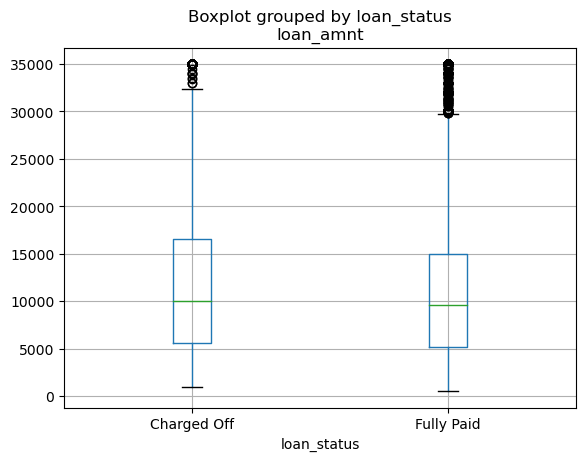

In [56]:
loan_df.boxplot(column='loan_amnt',by='loan_status')

### As seen from huge difference in mean and median , and box plot there are outliners.Considering 75 quartile in plot its clear as higher the amount  there is higher risk of loan default


## segmented cateorical analysis

In [57]:
def univariateSegementedAnalysis(column,data=loan_df):
    loan_df['loan_status_numeric'] = loan_df['loan_status'].apply(lambda x: 1 if x== 'Charged Off' else 0 )
    
    if((loan_df[column].dtypes == 'O') | (column in ['pub_rec','issued_year','issued_month','pub_rec_bankruptcies'])):
        new_percentile_column = column + '_div'
        data[ new_percentile_column]=data[column]
    else:
        new_percentile_column = column + '_percentile'
        data[ new_percentile_column]= pd.qcut(loan_df[column],q=5,labels=['Lowest','Lower','Medium','Higher','Highest'])
    loan_grp_by_df = loan_df.groupby(new_percentile_column)['loan_status_numeric'].value_counts(normalize =True).rename("Charged off %").reset_index()
    loan_grp_by_df = loan_grp_by_df.loc[loan_grp_by_df.loan_status_numeric ==1].sort_values('Charged off %',ascending=False).drop(columns=['loan_status_numeric']).reset_index(drop=True)
    return loan_grp_by_df


In [58]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies',
       'issued_year', 'issued_month'],
      dtype='object')

In [59]:
univariateSegementedAnalysis(column='loan_amnt')

,loan_amnt_percentile,Charged off %
0,Highest,0.187624
1,Higher,0.145368
2,Lowest,0.138725
3,Medium,0.131613
4,Lower,0.123521


Conslusion: Higher the loan amount higher the chances of charged off

In [60]:
univariateSegementedAnalysis(column='funded_amnt')

,funded_amnt_percentile,Charged off %
0,Highest,0.190213
1,Higher,0.143829
2,Lowest,0.139299
3,Medium,0.136805
4,Lower,0.118425


In [61]:
univariateSegementedAnalysis(column='term')

,term_div,Charged off %
0,60 months,0.253138
1,36 months,0.110909


Conclusion: For 5 year term , default rate is 25 % .So it implies for higher payment term higher chances of default.  

In [62]:
univariateSegementedAnalysis(column='int_rate')

,int_rate_percentile,Charged off %
0,Highest,0.262150
1,Higher,0.171619
2,Medium,0.146995
3,Lower,0.102876
4,Lowest,0.053538


Conclusion: Higher the interest rate higher is charged off percentage

In [63]:
univariateSegementedAnalysis(column='installment')

,installment_percentile,Charged off %
0,Highest,0.166321
1,Higher,0.152988
2,Lowest,0.145153
3,Medium,0.132936
4,Lower,0.131934


Conclusion: Higher installment amount higher is charged off percentage

In [64]:
univariateSegementedAnalysis(column='grade')

,grade_div,Charged off %
0,G,0.337793
1,F,0.326844
2,E,0.268494
3,D,0.219862
4,C,0.171943
5,B,0.122056
6,A,0.059930


Grades G,F,E have higher default rate.

In [65]:
univariateSegementedAnalysis(column='sub_grade')

,sub_grade_div,Charged off %
0,F5,0.477876
1,G3,0.422222
2,G2,0.363636
3,F4,0.350993
4,G5,0.344828
5,G1,0.329787
6,F2,0.300429
7,F1,0.298361
8,E4,0.297170
9,F3,0.293103


Sub Grades F5 and G3 have above 40% charged off rate.

In [66]:
univariateSegementedAnalysis(column='annual_inc')

,annual_inc_percentile,Charged off %
0,Lowest,0.183126
1,Lower,0.156926
2,Medium,0.149629
3,Higher,0.129651
4,Highest,0.109285


Conclusion: Higher Anuual Income lower is the charged off%

In [67]:
univariateSegementedAnalysis(column='dti')

,dti_percentile,Charged off %
0,Highest,0.168853
1,Higher,0.157908
2,Medium,0.147609
3,Lower,0.132627
4,Lowest,0.122409


Higher debt to income ratio higher is the charged off%

In [68]:
univariateSegementedAnalysis(column='emp_length')

,emp_length_div,Charged off %
0,10+ years,0.156810
1,7 years,0.153711
2,1 year,0.143894
3,5 years,0.143394
4,< 1 year,0.141748
5,6 years,0.141605
6,8 years,0.141463
7,3 years,0.138335
8,4 years,0.138241
9,2 years,0.132137


In [69]:
univariateSegementedAnalysis(column='home_ownership')

,home_ownership_div,Charged off %
0,OTHER,0.183673
1,RENT,0.153626
2,OWN,0.148908
3,MORTGAGE,0.136713


Not much information can be derived from emp_length,home_ownership 

In [70]:
univariateSegementedAnalysis(column='verification_status')

,verification_status_div,Charged off %
0,Verified,0.168032
1,Source Verified,0.148186
2,Not Verified,0.128310


Verified customers have more charged off rate than not verified

In [71]:
univariateSegementedAnalysis(column='purpose')

,purpose_div,Charged off %
0,small_business,0.270810
1,renewable_energy,0.186275
2,educational,0.172308
3,other,0.163777
4,house,0.160763
5,moving,0.159722
6,medical,0.155653
7,debt_consolidation,0.153254
8,vacation,0.141333
9,home_improvement,0.120696


Loan taken for  small_business,renewable_energy and educational have chanes of getting defaulted.

In [72]:
univariateSegementedAnalysis(column='pub_rec')

,pub_rec_div,Charged off %
0,1,0.227024
1,2,0.208333
2,0,0.141343


Applicants with non zero derogatory public records have higher charged off rate

In [73]:
univariateSegementedAnalysis(column='pub_rec_bankruptcies')

,pub_rec_bankruptcies_div,Charged off %
0,2.0,0.400000
1,1.0,0.223580
2,0.0,0.141868


Applicants Having higher bankruptcy records have hihger charged off rate 

In [74]:
univariateSegementedAnalysis(column='issued_year')

,issued_year_div,Charged off %
0,7,0.179283
1,11,0.158705
2,8,0.158131
3,10,0.128772
4,9,0.125954


In [75]:
univariateSegementedAnalysis(column='issued_month')

,issued_month_div,Charged off %
0,Dec,0.160854
1,May,0.159644
2,Sep,0.156375
3,Oct,0.154214
4,Jun,0.151887
5,Nov,0.149276
6,Jul,0.142942
7,Aug,0.138135
8,Jan,0.134931
9,Apr,0.130696


During the month of december and may there are highest loan application been charged off.Mostly due to holidays.

In [76]:
univariateSegementedAnalysis(column='addr_state')

,addr_state_div,Charged off %
0,NE,0.600000
1,NV,0.225470
2,SD,0.193548
3,AK,0.192308
4,FL,0.181230
5,MO,0.170149
6,HI,0.168675
7,ID,0.166667
8,NM,0.163934
9,OR,0.163218


NE is the most riskiest state followed by NV,SD,AK,FL.

###  Bivariate Analysis

In [77]:
charged_df = loan_df[loan_df.loan_status=="Charged Off"]

In [78]:
charged_df.corr()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12784\3056540731.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  charged_df.corr()


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies,issued_year,loan_status_numeric,pub_rec_div,pub_rec_bankruptcies_div,issued_year_div
loan_amnt,1.000000,0.979134,0.907129,0.351216,0.925911,0.352359,0.063872,-0.029843,0.007480,0.184323,-0.047690,0.313101,0.283738,-0.028286,0.118279,NaN,-0.047690,-0.028286,0.118279
funded_amnt,0.979134,1.000000,0.926996,0.353906,0.953826,0.347131,0.060861,-0.027366,0.007942,0.181439,-0.052527,0.296956,0.275088,-0.033212,0.130878,NaN,-0.052527,-0.033212,0.130878
funded_amnt_inv,0.907129,0.926996,1.000000,0.369863,0.858041,0.314505,0.072924,-0.031524,-0.018395,0.154601,-0.052717,0.254045,0.252796,-0.036099,0.313776,NaN,-0.052717,-0.036099,0.313776
int_rate,0.351216,0.353906,0.369863,1.000000,0.327909,0.132252,0.040607,0.119643,0.058475,0.038607,0.079085,0.075878,-0.008655,0.074839,0.180447,NaN,0.079085,0.074839,0.180447
installment,0.925911,0.953826,0.858041,0.327909,1.000000,0.358656,0.042358,-0.012530,0.018359,0.179676,-0.041068,0.299930,0.251874,-0.025611,0.028281,NaN,-0.041068,-0.025611,0.028281
annual_inc,0.352359,0.347131,0.314505,0.132252,0.358656,1.000000,-0.089725,0.021765,0.037303,0.212320,-0.006679,0.379449,0.287343,-0.004122,-0.020013,NaN,-0.006679,-0.004122,-0.020013
dti,0.063872,0.060861,0.072924,0.040607,0.042358,-0.089725,1.000000,-0.068839,-0.028810,0.299230,0.007990,0.239712,0.272802,0.018904,0.098510,NaN,0.007990,0.018904,0.098510
delinq_2yrs,-0.029843,-0.027366,-0.031524,0.119643,-0.012530,0.021765,-0.068839,1.000000,-0.011454,-0.018495,-0.001608,-0.081994,0.059658,0.002453,0.013049,NaN,-0.001608,0.002453,0.013049
inq_last_6mths,0.007480,0.007942,-0.018395,0.058475,0.018359,0.037303,-0.028810,-0.011454,1.000000,0.078767,0.013126,-0.010770,0.103554,0.008612,-0.087765,NaN,0.013126,0.008612,-0.087765
open_acc,0.184323,0.181439,0.154601,0.038607,0.179676,0.212320,0.299230,-0.018495,0.078767,1.000000,0.049776,0.330555,0.686425,0.061357,-0.000132,NaN,0.049776,0.061357,-0.000132


1. Loan_amnts,installments,funded_amnt,funded_amnt_inv are having hiher positive correlation.
2. Pub_rec and pub_rec_bankruptcies are negatively correlated with loan amount but positively corelated with open_acc and total_acc

<Axes: xlabel='addr_state', ylabel='purpose'>

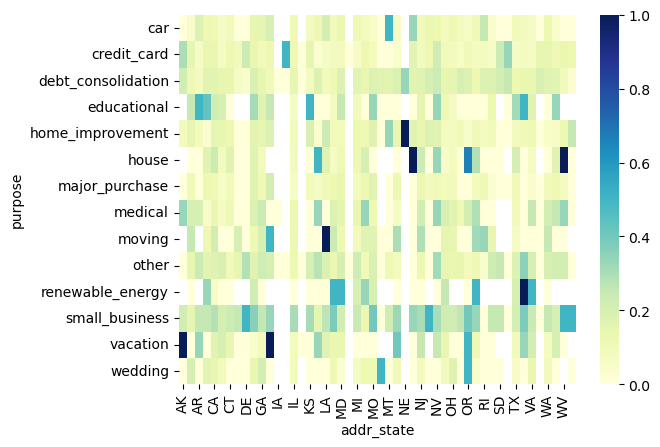

In [79]:
pt=pd.pivot_table(data=loan_df,values='loan_status_numeric',index='purpose',columns='addr_state')
sns.heatmap(pt,cmap='YlGnBu')

Darker intersection of addr_state with purpose of loan,has higher charged off rate
vacation role in AK,IA.moving expenses in moving.Home improvement and home expenses in NE,NJ.

<Axes: xlabel='purpose', ylabel='annual_inc_percentile'>

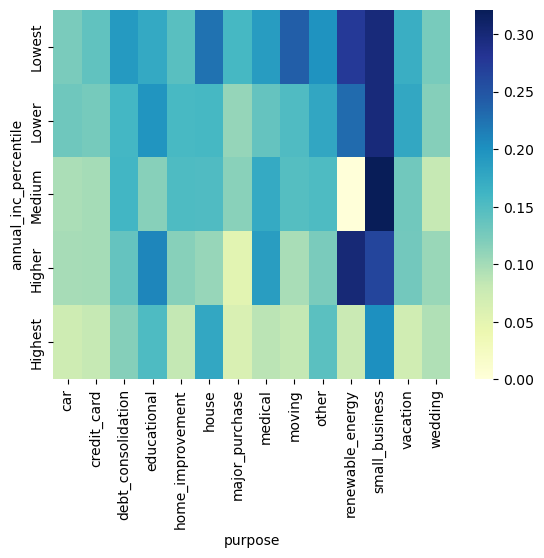

In [80]:
pt=pd.pivot_table(data=loan_df,values='loan_status_numeric',index='annual_inc_percentile',columns='purpose')
sns.heatmap(pt,cmap='YlGnBu')

small bussiness loans for medium and lowest income grouos are riskier.Renewable loans for higher income groups are  riskier.

### Derieved metrics

Added Ordinal variables like '%_percentile' columns to perform univariate and bivariate analysis.
Added Issued_date,Issued_year to perform univariate naalysis.